### TUTORIAL PARA EL USO DE REDAPYX A NIVEL DISTRITAL
Redapyx es una libreria escrita en python que permite descargar datos censales del procesador estadístico de Redatam (https://censos2017.inei.gob.pe/redatam/) y transformar sus resultados en una matriz que usa el ubigeo como variable única de indexación.

Para el siguiente ejemplo, vamos a usar Redapyx para explorar las características de la población que vive en viviendas alquiladas en Lima metropolitana en el año 2017. Para ello, lo primero que haremos será llamar la libreria _redapy_ y la libreria _pandas_, esencial para el procesamiento de bases de datos.

In [1]:
import sys
sys.path.append("C:\\Users\\Guillermo\\Desktop\\Python\\05. Lib gestión pública")

import redapyx
import pandas as pd
import geopandas as gpd
import os

### Quick start

Para describir las características de la población en viviendas alquiladas iniciamos identificando la condición de las viviendas censadas. La variable "vivienda.C2P13" recoge las respuestas sobre la tenencia de la vivienda en el módulo de vivienda del censo 2017.

Para comunicarnos con REDATAM usamos la función _get_. Esta función, utiliza parámetros previamente definidos para solicitar información a REDATAM y realizar la limpieza de las tablas descargadas. El primer parámetro a definir es el tipo de consulta, en nuestro caso al ser una consulta de una sola variable usamos el valor "frequency" con el parámetro denominado como "table_type" (table_type="frequency"). Luego podemos definir otros parámetros, por ejemplo vamos a especificar el nivel de salida de la variable (area_break="distrito") y el ubigeo de interés que en nuestro caso es la provincia de Lima Metropolitana (1501). De esta forma, los parámetros son:
- table_type ="Frequency"
- var1="vivienda.C2P13" 
- area_break="distrito"
- selection="1501"

In [8]:
redapyx.get(table_type='frequency',var1="vivienda.C2P13",area_break="distrito", selection="1501")

Scraping starts
REDATAM webpage opened successfully
Output table loaded successfully
Table was scraped successfully in: 0:00:06.911991
Table was cleaned successfully in: 0:00:00.296229


,resp,fre,ubigeo
8,Alquilada,26985,150101
9,Propia sin título de propiedad,10045,150101
10,Propia con título de propiedad,31809,150101
11,Cedida,5326,150101
12,Otra forma,200,150101
...,...,...,...
512,Alquilada,8881,150143
513,Propia sin título de propiedad,27677,150143
514,Propia con título de propiedad,49947,150143
515,Cedida,7209,150143


El resultado nos muestra que la consulta se ejecutó en cerca de 6 segundos y devolvió una base de datos con las respuestas a la pregunta sobre la tenencia de la vivienda, la frecuencia de los casos y el ubigeo para cada categoría.

Esta estructura de datos, es la forma básica de Redapyx y permite trabajar con los datos de forma simple y eficaz al permitir filtar las frecuencias de acuerdo con la respuesta y el ubigeo. Sin embargo, no es la única forma posible, **Redapyx** permite transformar esta tabla en una matriz de 2x2, que toma la variable de ubigeo como identificador único (index) y las categorias de la variable seleccionada como columnas para una visualización o análisis exploratorio. Esto se logra agregando el parámetro "pivot=True"

_Nota que hemos nombrado el resultado con el nombre de "df", que es una convención para nombrar a un determinado dataframe_

In [87]:
gdf=redapyx.get(table_type='frequency',var1="poblacion.C5P86",area_break="distrito",selection="1501", pivot=True, output="geodata", factor_exp=True)


Scraping starts
REDATAM webpage opened successfully
Output table loaded successfully
Table was scraped successfully in: 0:00:08.627960
Table was cleaned successfully in: 0:00:00.203022


In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable



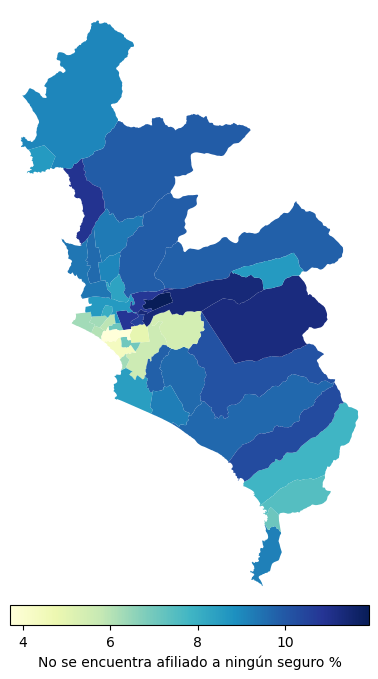

In [90]:
gdf["total"]=gdf.sum(axis=1,numeric_only=True)
gdf["No se encuentra afiliado a ningún seguro %"]=(gdf["No se encuentra afiliado a ningún seguro"]/gdf.total)*100

fig, ax= plt.subplots(figsize=(5,8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3.5%", pad=0.07)

gdf.plot("No se encuentra afiliado a ningún seguro %", legend=True,
         legend_kwds={"label": "No se encuentra afiliado a ningún seguro %",
                      "orientation": "horizontal"},
         cax=cax,
         cmap="YlGnBu",ax=ax)
ax.set_axis_off()
ax.margins(0.02)
plt.savefig("Lima_metropolitana_seguro.jpg",)

In [5]:
df=redapyx.get(table_type='frequency',var1="vivienda.C2P13",area_break="distrito",selection="1501", pivot=True)
df

Scraping starts
REDATAM webpage opened successfully
Output table loaded successfully
Table was scraped successfully in: 0:00:06.380397
Table was cleaned successfully in: 0:00:00.251860


resp,Alquilada,Cedida,Otra forma,Propia con título de propiedad,Propia sin título de propiedad
ubigeo,,,,,
150101,26985,5326,200,31809,10045
150102,1134,926,17,5111,9539
150103,38579,9859,191,56636,46421
150104,3802,549,39,5529,1034
150105,9988,1396,63,9972,2980
150106,10497,5723,83,29025,34213
150107,1762,925,8,4904,2168
150108,17977,6291,98,30283,18827
150109,1041,1117,11,1646,5139


De esta forma, con solo **2 líneas de código** y en menos de **5 minutos** obtenemos todas las categorias de la variable en una matriz de 2x2, donde cada fila corresponde a un distrito de Lima Metropolitana y cada columna a una de las categorías de la variable de la tenencia de la vivienda. Este resultado puede ser usado para graficar las frecuencias de los datos o para visualizar la distribución de la variable espacialmente en un mapa. Para guardar los resultados de la matriz resultante en formato Excel podemos usar el módulo de pandas _to_excel()_.

El resultado final del código para realizar **la consulta, transformar los resultados y guardarlos** sería el siguiente:

In [7]:
df=redapyx.get(table_type='frequency',var1="vivienda.C2P13",area_break="distrito",selection="1501")

df.to_excel("tenencia de la vivienda_2017_pivot.xlsx")## Guardamos el resultado en un archivo excel

  Scraping starts
  REDATAM webpage opened successfully
  Output table loaded successfully
  Table was scraped successfully in: 0:00:06.699997
  Table was cleaned successfully in: 0:00:00.224694


**redapyx** provee al usuario la posibilidad de agregar información georreferenciada a nivel de distrito, provincia o departamento a la consulta de datoas de Redatam, mediante la integración con datos espaciales INEI, lo que son descargados y guardados en una carpeta denominada como "espatial_data" en la ruta desde donde se ejecuta el script. Si bien este es un proceso que puede realizarse manualmente descargando la data espacial del INEI, **redapyx** optimiza este paso para integrar la descarga, la limpieza y la visualización en una sola función.

- _Este resultado se logra agregando el parámetro output="geodata"_
- _Los datos espaciales correspondientes al censo 2017, están disponibles en el siguiente enlace: https://ide.inei.gob.pe/#capas_

El resultado, es una tabla con datos georreferenciados que incluye los nombres del nivel de los datos, la geometría del campo ('geometry') y la fuente de donde proviene la información.
- _Para acceder a este resultado es necesario tener instalado la libreria geopandas. En caso contrario, se mostrará un mensaje de error solicitando la librería en mención_

In [9]:
gdf=redapyx.get(table_type='frequency',var1="vivienda.C2P13",area_break="distrito", selection="1501", pivot=True, output="geodata")
## visualizamos la tabla
gdf.head(3)

Scraping starts
REDATAM webpage opened successfully
Output table loaded successfully
Table was scraped successfully in: 0:00:07.307974
Table was cleaned successfully in: 0:00:00.234104


,nombdep,nombprov,nombdist,Alquilada,Cedida,Otra forma,Propia con título de propiedad,Propia sin título de propiedad,geometry,fuente
ubigeo,,,,,,,,,,
150119,LIMA,LIMA,LURIN,4408,1730,31,8253,7515,"MULTIPOLYGON (((-76.93986 -12.24773, -76.93962...",INEI - CPV2017 RESULTADOS
150139,LIMA,LIMA,SANTA ROSA,526,395,10,2133,5250,"MULTIPOLYGON (((-77.14355 -11.79587, -77.15237...",INEI - CPV2017 RESULTADOS
150140,LIMA,LIMA,SANTIAGO DE SURCO,26730,3450,113,54685,12091,"MULTIPOLYGON (((-76.94775 -12.11754, -76.94809...",INEI - CPV2017 RESULTADOS


Con la información georreferenciada de la tenencia de la vivienda podemos crear una visualización exploratoria usando la librería integrada de geopandas _plot_. El resultado nos muesta una concetración en el número de viviendas en condición de alquiler los distritos de San Martín de Porres, San Juan de Lurigancho y Ate, donde se concentran más de 20 mil viviendas en tenencia de alquiler.

Esta nueva base con datos espaciales puede ser guardada usando la función _to_file_ de geopandas.

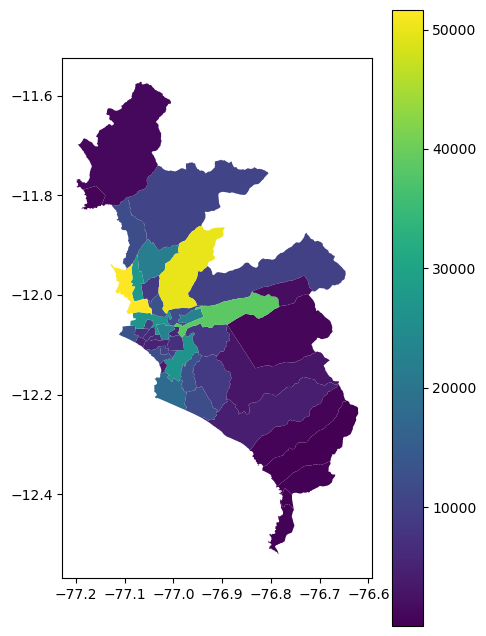

In [10]:
gdf.plot("Alquilada", legend=True, figsize=(5,8))
# ## Guardamos el resultado en un archivo excel
gdf.to_file("tenencia de la vivienda_2017.gpkg")

### Exploración de los resultados

Si bien la tabla anterior ya puede ser utilizada para hacer operaciones en excel o Qgis, nos interesa realizar algunos cálculos adicionales usando la libreria pandas.
Iniciaremos identificando el porcentaje de viviendas en alquiler por distrito, para ello lo primero que haremos será calcular la suma de viviendas y luego el porcentaje de viviendas alquiladas.

In [32]:
## creamos una variable con la suma total de casos por ubigeo
gdf['viviendas_total']=gdf.sum(axis=1,numeric_only=True) 
## creamos una variable con el porcentaje de la variable vivienda alquilada con respecto al total de viviendas
gdf['alquiler_p']=((gdf.Alquilada/gdf.viviendas_total)*100).round(1)
## Ahora mostramos las 5 primeras filas con la condición de que estén ordenadas de mayor a menor
gdf.sort_values("alquiler_p",ascending=False).head()

,nombdep,nombprov,nombdist,Alquilada,Cedida,Otra forma,Propia con título de propiedad,Propia sin título de propiedad,geometry,fuente,viviendas_total,alquiler_p
ubigeo,,,,,,,,,,,,
150115,LIMA,LIMA,LA VICTORIA,22935,3043,113,17967,4730,"MULTIPOLYGON (((-77.00316 -12.06262, -77.00388...",INEI - CPV2017 RESULTADOS,97623.0,23.5
150137,LIMA,LIMA,SANTA ANITA,22872,4734,55,14796,9336,"MULTIPOLYGON (((-76.97343 -12.05848, -76.97223...",INEI - CPV2017 RESULTADOS,103630.2,22.1
150105,LIMA,LIMA,BREÑA,9988,1396,63,9972,2980,"MULTIPOLYGON (((-77.04567 -12.06525, -77.04318...",INEI - CPV2017 RESULTADOS,48838.9,20.5
150134,LIMA,LIMA,SAN LUIS,5471,805,24,6083,1219,"MULTIPOLYGON (((-76.99780 -12.06084, -76.99831...",INEI - CPV2017 RESULTADOS,27244.2,20.1
150141,LIMA,LIMA,SURQUILLO,10159,1303,58,13129,3177,"MULTIPOLYGON (((-77.01044 -12.10728, -77.01469...",INEI - CPV2017 RESULTADOS,55688.5,18.2


La tabla anterior muestra que en los ditritos de la Victoria (150115), Santa Anita (150137), Breña (150105), San Luis (150134) y Surquillo (150141), se encuentran el mayor porcentaje de viviendas alquiladas en el año 2017, respectivamente. Por otra parte, que la vivienda se encuentre alquilada no quiere decir que la mayoría de hogares o personas del distrito vivian en viviendas alquiladas. Por esta razón, calculamos la misma información pero a nivel de persona censada. Usaremos nuevamente el módulo de redapyx, pero agregaremos una variable a la consulta: el sexo del encuestado (C5P2). Esto se logra cambiando el parámetro _table_type_ por "crosstab" que nos permite realizar consultas para 2 variables (var1="vivienda.C2P13" y var2="poblacion.C5P2").

_Nota: Además pasamos el parámetro "output_info=False" y factor_exp=True, para reducir el número de msj durante la ejecución de la función y para que obtener la información de la población con el factor de corrección generado por el INEI_

In [26]:
df2=redapyx.get(table_type='crosstab',var1="vivienda.C2P13", var2="poblacion.C5P2",area_break="distrito",selection="1501", output_info=False,factor_exp=True)
df2.head(10)


Table was scraped successfully in: 0:00:07.319674
Table was cleaned successfully in: 0:00:00.332121


freq
ubigeo fila                           columna        
150101 Alquilada                      Hombre    42429
                                      Mujer     44135
                                      Total     86564
       Propia sin título de propiedad Hombre    17841
                                      Mujer     19253
                                      Total     37093
       Propia con título de propiedad Hombre    59413
                                      Mujer     63437
                                      Total    122850
       Cedida                         Hombre     9647

Ahora podemos ver que tenemos el total de hombres y mujeres por el ubigeo del distrito y el tipo de tenencia de la vivienda. A continuación, haremos algunos cambios a la tabla para lograr obtener el dato deseado.

_OJO: Si quisieramos tener una tabla multicolumna, solo sería necesario pasar el parámetro "pivot=True" en el redapyx.get() previo

In [28]:
## Nos quedamos con la variable total y pivoteamos el resultado
df2=df2.reset_index().query('columna=="Total"').pivot(index="ubigeo",columns="fila",values="freq")
## sumamos todas las variables para tener el total de población por tipo de tenencia
df2['pob_total']=df2.sum(axis=1) 
## creamos una variable con el porcentaje de la variable vivienda alquilada con respecto al total de viviendas
df2['alquiler_pob_p']=((df2.Alquilada/df2.pob_total)*100).round(1)
## Ahora mostramos las 5 primeras filas con la condición de que estén ordenadas de mayor a menor
df2.sort_values("alquiler_pob_p",ascending=False).head(9)

fila,Alquilada,Cedida,Otra forma,Propia con título de propiedad,Propia sin título de propiedad,pob_total,alquiler_pob_p
ubigeo,,,,,,,
150115,80705,11711,436,73504,18814,185170,43.6
150105,33793,5265,217,37928,10950,88153,38.3
150137,76047,19991,203,70832,44005,211078,36.0
150134,18589,3282,86,27050,5345,54352,34.2
150116,19770,2960,66,30358,4714,57868,34.2
150141,31356,4738,197,47088,12202,95581,32.8
150101,86564,19464,683,122850,37093,266654,32.5
150104,10950,1817,141,18352,3560,34820,31.4
150122,31233,2551,173,60991,6127,101075,30.9


En relación a la población en vivienda alquiladas, el distrito de Breña es el segundo distrito con más población en viviendas alquiladas, ello a pesar de ser el tercero con más viviendas con tenencia en situación de alquiler. Algo similar ocurre con el distrito de Lince (150116) el cual a pesar de ser el 7mo distrito con mayor porcentaje de viviendas en alquiler, es el cuarto con más población habitandolas.

Esta información no lleva a la siguiente pregunta, ¿cuál es el ratio entre población y viviendas alquiladas? Para resolver esta pregunta, procederemos a unir ambos _Dataframes_ (viviendas por tipo de tenencia y población por tipo de tenencia de la vivienda) usando la función _join_ de pandas y calcular nuestro indicador.

_**Este ejercicio resulta mucho más sencillo, gracias a que la función de limpieza de Redapyx toma siempre al ubigeo como variable clave para indexar la información**, otra manera de hacer esta operación sería con la función de pandas **merge**_

In [29]:
## unimos ambas BD usando la función join que utiliza los index para hacer el merge
df3=(gdf[["nombdep","nombprov","nombdist","Alquilada","viviendas_total","alquiler_p","geometry"]].
     join(df2.rename({"Alquilada":"Alquilada_pob"},axis=1)[["Alquilada_pob","pob_total","alquiler_pob_p"]]))
df3=df3[['nombdep', 'nombprov', 'nombdist', 'viviendas_total','Alquilada',
      'alquiler_p','pob_total', 'Alquilada_pob', 'alquiler_pob_p','geometry']] ## ordenamos las variables

## Calculamos el ratio
df3["ratio"]=(df3.Alquilada_pob/df3.Alquilada).round(2)
df3.sort_values("ratio",ascending=False).head(2)

,nombdep,nombprov,nombdist,viviendas_total,Alquilada,alquiler_p,pob_total,Alquilada_pob,alquiler_pob_p,geometry,ratio
ubigeo,,,,,,,,,,,
150142,LIMA,LIMA,VILLA EL SALVADOR,83775,11964,14.3,410077,50438,12.3,"MULTIPOLYGON (((-76.91096 -12.23349, -76.91003...",4.22
150133,LIMA,LIMA,SAN JUAN DE MIRAFLORES,78130,13078,16.7,396431,55245,13.9,"MULTIPOLYGON (((-76.95434 -12.11556, -76.95472...",4.22


Luego de cruzar ambos _dataframes_, observamos que el ratio más alto de personas por vivienda alquilada se encuentra en el distrito de Villa el Salvador con casi 4 personas por vivienda alquilada, ello a pesar de que el porcentaje de población en vivienda alquiladas es de solo 12%. Por su parte, el distrito de Miraflores tiene el ratio más bajo de personas por vivienda alquilada con alrededor de 2 personas por vivienda con este tipo de tenencia, además de ser el noveno distrito con más población en viviendas alquiladas con 31% de sus vecinos alquilando una vivienda.

In [30]:
df3.sort_values("ratio",ascending=False).tail(2)

,nombdep,nombprov,nombdist,viviendas_total,Alquilada,alquiler_p,pob_total,Alquilada_pob,alquiler_pob_p,geometry,ratio
ubigeo,,,,,,,,,,,
150138,LIMA,LIMA,SANTA MARIA DEL MAR,282,51,18.1,1034,143,13.8,"MULTIPOLYGON (((-76.76045 -12.39682, -76.76519...",2.80
150122,LIMA,LIMA,MIRAFLORES,36953,12537,33.9,101075,31233,30.9,"MULTIPOLYGON (((-77.00259 -12.12656, -77.00468...",2.49


### Visualización en forma de mapa
Ahora que tenemos nuestros indicadores podemos visualizarlos en forma de mapa usando los límites distritales del INEI y la librería **_matplotlib_**, la cual permite crear visualizaciones complejas. Note que al haber cruzado la base de datos de la tenencia ya con los valores de geometría no es necesario volver a hacer el cruce con los datos espaciales.

_Este mismo ejercicio de visualización se puede realizar con otros programas de GIS como, por ejemplo, QGIS_

Text(0.5, 1.0, 'Ratio entre el total de personas en viviendas\n alquiladas y el total de viviendas alquiladas')

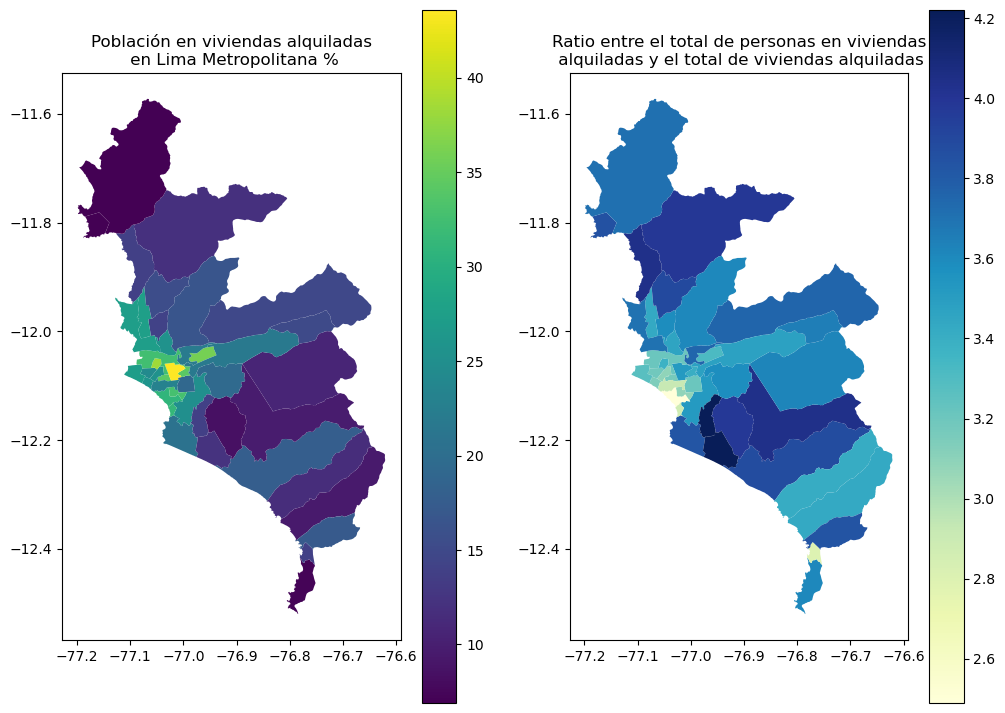

In [31]:
import matplotlib.pyplot as plt ## libreria para la visualización de data

## Usaremos la libreía Matplotlib para graficar el resultado
fig,ax=plt.subplots(1,2, figsize=(12,9))

df3.plot("alquiler_pob_p",ax=ax[0], legend=True)
df3.plot("ratio",ax=ax[1], legend=True, cmap="YlGnBu")

ax[0].set_title("Población en viviendas alquiladas\n en Lima Metropolitana %") 
ax[1].set_title("Ratio entre el total de personas en viviendas\n alquiladas y el total de viviendas alquiladas")

### Filtros para consultas en REDATAM

Ahora que conocemos el total de personas que viven en viviendas alquiladas, imaginemos que queremos conocer su permanencia en el distrito en los últimos 5 años y en qué distrito vivia antes, en caso se haya mudado en los últimos 5 años. Para este ejemplo tomaremos como referencia la respuesta del jefe del hogar sobre el lugar donde vivía hace 5 años. Para realizar la consulta multivariable usaremos del parámetro _for_query_, el cual permite construir un filtro que combina una o más variables y sus respectivos valores. El detalle de los subparametros es el siguiente:

- ***variables***: lista la variable o variables que se usarán en el filtro.
- ***category***: lista el valor de la categoría que se usará para filtrar cada variable. ___Nota que la categoría siempre es un valor númerico, para saber el valor de la respuesta puedes revisar la cédula censal___
- ***logical_exp***: lista la expresión lógica que se usará para filtrar la variable (equal, greater than, less than, etc)
- ***operator***: es el operador que se usará para filtrar las variables, puede ser "and" u "or"

Como nos interesa solo la información la provincia donde vivia hace 5 años ("poblacion.C5P6PV"), usaremos la consulta tipo "frequency". Para garantizar que la consulta devuelva solo información de las viviendas alquiladas ("vivienda.C2P13") y del jefe del hogar ("poblacion.C5P1"), construimos nuestro filtro para ambas variables. En este caso tanto la condición de alquiler de la vivienda como la condición de jefe del hogar corresponde a los valores "1 ('category':["1", "1"]). Finalmente, especificamos en el **_operator_** que ambas condiciones se cumplan, para ello usaremos el valor ['and'] 

In [38]:
df4=redapyx.get(table_type='frequency',var1="poblacion.C5P6PV",area_break="distrito",selection="1501", factor_exp=True, output_info=False,
                for_query={'variables':["vivienda.C2P13","poblacion.C5P1"],
                           'category':["1","1"],
                           'logical_exp':["equal"],
                           'operator':['and']})

df4.head(5)

Table was scraped successfully in: 0:00:18.121225
Table was cleaned successfully in: 0:00:00.376896


,resp,fre,ubigeo
12,Continente América,457,150101
13,Continente Asia,36,150101
14,Continente Europa,69,150101
15,Continente Oceanía y Otras Regiones Polares,2,150101
16,Continente no especificado,2,150101


En un aproximado de 15 segundos obtenemos la tabla con la frecuencia de los lugares donde vivian hace 5 años los jefes del hogar que vivie en viviendas alquiladas. Para identificar aquellos que viven fuera de Lima Metropolitana, recodificamos la variable _resp_ diferenciando entre los que no vivian hace 5 años en LM ("no_LM") y los que sí vivian en LM ('si_LM') durante este perido de tiempo.

In [39]:
#Recodificamos la variable resp en una nueva variable llamada resp2.
df4['resp2']="no_LM"
df4.loc[df4['resp'].str.contains('Continente'), 'resp2'] = "otro_continente"
df4.loc[df4['resp'].str.contains("provincia de Lima"), 'resp2'] = "si_LM"
#agrupamos la variable recodicada por ubigeo sumamdo las fecuencias. luego pivoteamos la BD para tener una matriz de 2x2 con el ubigeo como index
df4=df4.groupby(["ubigeo","resp2"]).sum(numeric_only=True)[['fre']].reset_index().pivot(index="ubigeo",columns="resp2",values="fre")

## sumamos todas las variables para tener el total de los jefes del hogar por lugar donde vivian en los últimos 5 años
df4['jh_total']=df4.sum(axis=1, numeric_only=True)
## creamos una variable con el porcentaje de los jefes del hogar que vivian fuera de la provincia de Lima metropolitana
df4['jf_fuera_LM']=((df4.no_LM/df4.jh_total)*100).round(1)
df4['jf_fuera_LM_otro_con']=(((df4.no_LM+df4.otro_continente)/df4.jh_total)*100).round(1)
df4.sort_values("jf_fuera_LM_otro_con", ascending=False).head(6)

resp2,no_LM,otro_continente,si_LM,jh_total,jf_fuera_LM,jf_fuera_LM_otro_con
ubigeo,,,,,,
150122,902,2848,9578,13328,6.8,28.1
150139,147,9,442,598,24.6,26.1
150124,77,2,236,315,24.4,25.1
150138,12,3,45,60,20.0,25.0
150131,348,1052,4221,5621,6.2,24.9
150119,1144,87,4044,5275,21.7,23.3


Ahora podemos saber que el mayor procentaje de jefes del hogar en viviendas alquiladas que no vivian hace 5 años en la provincia de Lima metropolitan se encuentra en el distrito de Miraflores (150122) con 28% del total de jefes del hogar en el distrito. Llama la atención que de este total, 21% sea de jefes del hogar que vivían en el extranjero. Por su parte, el distrito donde se encuentra el menor número de jefes del hogar que no vivian en Lima Metropolitana hace 5 años es el distrito del Rimac con solo 9%, seguido por el distrito de Chaclacayo con 10% del total de jefes del hogar en vivienda alquiladas.

Ahora que sabemos que cerca del 84% de los jefes del hogar en vivienda alquiladas vivían en algún distrito de la provincia de Lima en los último 5 años, revisemos si estos datos son similares a nivel interdistrital. Para ello usaremos la pregunta sobre el distrito en que vivia el jefe del hogar hace 5 años ("poblacion.C5P6DI"). De forma similar al ejemplo anterior, pasaremos un filtro que considere la variable sobre la tenencia de la vivienda ('vivienda.C2P13') y la relación con el jefe del hogar ('poblacion.C5P1').

In [108]:
df5=redapyx.get(table_type='frequency',var1="poblacion.C5P6DI",area_break="distrito",selection="1501", factor_exp=True,
                for_query={'variables':["vivienda.C2P13","poblacion.C5P1"],
                           'category':["1","1"],
                           'logical_exp':["equal"],
                           'operator':['and']})
df5.head()

Scraping starts
REDATAM webpage opened successfully
Output table loaded successfully
Table was scraped successfully in: 0:00:43.357693
Table was cleaned successfully in: 0:00:01.281310


,resp,fre,ubigeo
12,Continente América país Argentina,31,150101
13,Continente América país Bolivia,3,150101
14,Continente América país Brasil,11,150101
15,Continente América país Canadá,2,150101
16,Continente América país Chile,29,150101


Procedemos a recodificar la variable resp para separar los lugares de procedencia de acuerdo con el departamento, provincia y distrito. Luego, usaremos la BD espacial de distritos 2017 para agregarle el ubigeo a cada uno de nuestros lugares de procedencia. Una vez recodificado el ubigeo de procedencia ('ubigeo_pro') creamos una nueva variable que identifique el total de jefes del hogar que no vivian en el mismo distrito de LM en los últimos 5 años.

In [121]:
# Creamos tres nuevas variables con los datos del departamento, provincia y distrito de  procedencia del jefe del hogar. 
df5["resp"]=df5["resp"].str.upper()
df5["dep"]=df5.resp.str.split(",", expand=True)[0]
df5["prov"]=df5.resp.str.split(",", expand=True)[1].str.strip()
df5["dis"]=df5.resp.str.split(":", expand=True)[1].str.strip().replace(["Á","É","Í","Ó","Ú"],["A","E","I","O","U"], regex=True)

## agregamos el ubigeo a los lugares de procendecia. Para ello haremos un loop usando los nombres de los ditritos de la BD espacial de distritos 2017- INEI
path_dis=os.path.join('spatial_data','Distrito.gpkg')
dis17=gpd.read_file(path_dis)
dis17["nombdist"]=dis17["nombdist"].str.strip()
dis17["ubigeo"]=dis17["ubigeo"].str.strip()

df5["ubigeo_pro"]=""
for ubigeo, dis_name in dis17.query('idprov=="1501"').set_index("ubigeo")["nombdist"].items():
    df5.loc[(df5.dis==dis_name) & (df5.dep=="LIMA") & (df5.prov=="LIMA"),"ubigeo_pro"]= ubigeo

## Mantenemos únicamente las variables que necesitamos
df5=df5[['resp', 'fre','ubigeo_pro', 'ubigeo']].copy()

## Creamos una nueva variable con el resultado de la comparación entre ubigeos.
df5["resp2"]="otro_distrito_fuera_LM"
df5.loc[((df5['ubigeo_pro']==df5['ubigeo']) & (df5.ubigeo_pro!="")) | (df5['resp']==("LIMA, LIMA, DISTRITO NO ESPECIFICADO")) , 'resp2'] = "mismo_distrito_LM"
df5.loc[(df5['ubigeo_pro']!=df5['ubigeo']) & (df5.ubigeo_pro!=""), 'resp2'] = "otro_distrito_LM"
df5.loc[(df5['resp'].str.contains('PAÍS'))|(df5['resp'].str.contains('CONTINENTE'))|(df5['resp']=="9999"), 'resp2'] = "otro_pais"

In [124]:
## Agrupamos la nueva variable por ubigeo de destino (el ubigeo donde se ubica el jefe del hogar), sumamos los resultados de la nueva variable ('resp2') y pivoteamos la BD
df6=df5.groupby(["ubigeo","resp2"]).sum(numeric_only=True)[['fre']].reset_index().pivot(index="ubigeo",columns="resp2",values="fre")
# sumamos todas las variables para tener el total de población por tipo de tenencia
df6['jh_total']=df6.sum(axis=1,numeric_only=True) 
## creamos una variable con el porcentaje de la variable vivienda alquilada con respecto al total de viviendas
df6['jh_otro_dis_LM_p']=((df6.otro_distrito_LM/df6.jh_total)*100).round(1)
df6.sort_values("jh_otro_dis_LM_p", ascending=False).head(5)

resp2,mismo_distrito_LM,otro_distrito_LM,otro_distrito_fuera_LM,otro_pais,jh_total,jh_otro_dis_LM_p
ubigeo,,,,,,
150130,4434,2463,797,368,8062,30.6
150120,2883,1600,563,272,5318,30.1
150139,262,178,146,9,595,29.9
150138,27,17,12,3,59,28.8
150131,2608,1612,346,1047,5613,28.7


La mayoria de los jefes del hogar que hace 5 años vivian en otro distrito al que fueron censados se encuentra en el distrito de San Borja y Magdalena con 30.6% y 20.1%, respectivamente. Podemos observar que a diferencia de lo que sucede con el distrito de Santa Rosa (150139), en estos dos el porcentaje de jefes del hogar en viviendas alquiladas que vivian fuera de Lima Metropolitana es de alrededor de 15% lo que los situa por debajo de la media de los distritos de LM (17%).

Estos datos pueden apreciarse mejor si son visualizados en espacialmente. Para ello, volvemos a usar la data spacial de distritos 2017 del INEI. Se revela cierta concentración en los distritos del sur de Lima de hogares que no vivian en la provincia de Lima hace 5 años. Mientras que cambio interdistrital de los hogares que viven en viviendas alquiladas al interior de LM se estaría concentrando en los distritos de Lima centro como San Borja, Magdalena, Puedo Libre, San Miguel y Barranco.

Text(0.5, 1.0, 'Jefes del hogar en viviendas alquiladas\n que hace 5 años vivian en otro distrito\n de Lima Metropolitana %')

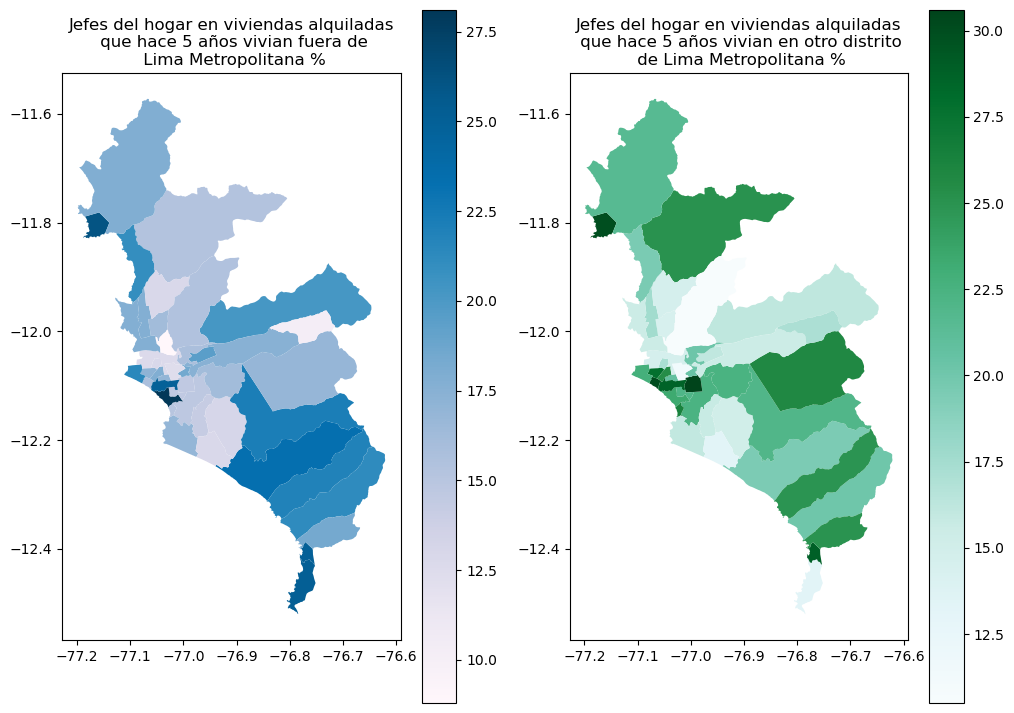

In [132]:
df7=df4[['jf_fuera_LM_otro_con']].join(df6[['jh_otro_dis_LM_p']].sort_index())
vis2=dis17.set_index('ubigeo').merge(df7, right_index=True, left_index=True, how='inner', validate='1:1')

## Usaremos la libreía Matplotlib para graficar el resultado
fig,ax=plt.subplots(1,2, figsize=(12,9))

vis2.plot("jf_fuera_LM_otro_con",ax=ax[0], legend=True, cmap="PuBu")
vis2.plot("jh_otro_dis_LM_p",ax=ax[1], legend=True, cmap="BuGn")

ax[0].set_title("Jefes del hogar en viviendas alquiladas\n que hace 5 años vivian fuera de\n Lima Metropolitana %") 
ax[1].set_title("Jefes del hogar en viviendas alquiladas\n que hace 5 años vivian en otro distrito\n de Lima Metropolitana %")

### Análisis de las redes de procedencia y destino de los hogares que alquilan una vivienda en el 2017

Finalmente, revisamos de forma exploratoria lo 5 principales nodos de atracción de hogares que alquilan viviendas en el 2017. Para ello, haremos uso de la libreria _networkx_ la cual permite convertir la Base de datos en un estructura de redes. Para una mejor visualización, solo se considera para el análisis los 4 primeros distritos de procedencia para cada uno de nuestros 5 principales destinos seleccionados.

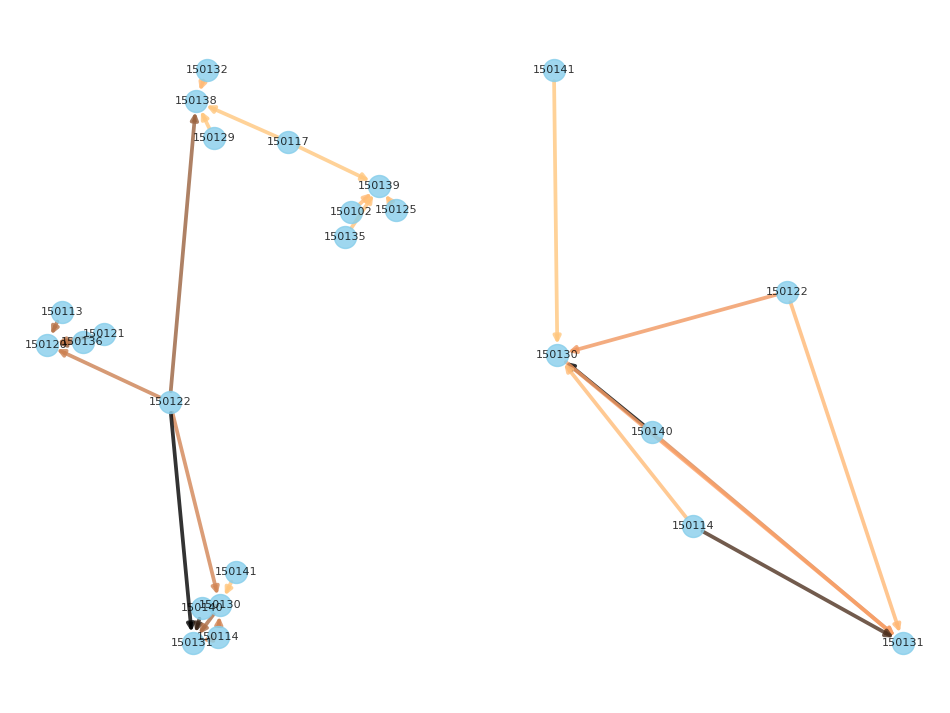

In [134]:
# libraries
import numpy as np
import networkx as nx

def keep_first2(df):
    df=df.sort_values('fre', ascending=False).iloc[0:4]
    return df

df8=(df5.
     groupby(["ubigeo","ubigeo_pro","resp2"]).
     sum(numeric_only=True)[['fre']].
     reset_index('resp2').
     query('resp2=="otro_distrito_LM"').
     groupby(level=0).
     apply(keep_first2).
     reset_index(level=0, drop=True).
     reset_index()
    )

v1=df8.query('ubigeo=="150130" | ubigeo=="150120" | ubigeo=="150139" | ubigeo=="150138"|ubigeo=="150131"').copy()
v2=df8.query('ubigeo=="150130" |ubigeo=="150131"').copy()

# # Build your graph
G1=nx.from_pandas_edgelist(v1, 'ubigeo_pro', 'ubigeo', create_using=nx.DiGraph())
G2=nx.from_pandas_edgelist(v2, 'ubigeo_pro', 'ubigeo', create_using=nx.DiGraph())

# Plot it
f, ax=plt.subplots(1,2, figsize=(12,9))
nx.draw(G1, with_labels=True, arrows=True, node_size=250, font_size=8, width=2.7,node_color='skyblue', alpha=0.8, edge_color=v1['fre'],ax=ax[0],edge_cmap=plt.cm.copper_r)
nx.draw(G2, with_labels=True, arrows=True, node_size=250, font_size=8, width=2.7,node_color='skyblue', alpha=0.8, edge_color=v2['fre'],ax=ax[1],edge_cmap=plt.cm.copper_r)

plt.show()

Del gráfico anterior se puede observar que los 3 de los 5 distritos de mayor cantidad de hogares en viviendas alquiladas se consolidan como claros nodos de atracción. A su vez, 4 cuatro de los 5 distritos son lugares de recepción de hogares que hace 5 años vivian en viviendas alquiladas en el distrito de Miraflores, donde destaca el ditrito de San Isidro, Santa Maria del Mar y Magdalena del Mar. Finalmente, llama la atención la dinámica entre San Borja (150130), San Isidro (150131), Santiago de Surco (150140) y La Molina (150114), cuyos distritos forman un subsistema de nodos y flujos.